# 软间隔分类
$$\min_{\mathbf w, b}\frac12\|\mathbf w\|^2 + C\sum_{i = 1}^ml_{0/1}(y_i(\mathbf w^\top\mathbf x_i + b) - 1)$$
- 0/1损失函数：$l_{0/1}(z) = \begin{cases}1\text{, if } z < 0 \\ 0\text{, otherwise}\end{cases}$
- 替代损失：
	- hinge损失：$l_{\mathtt{hinge}}(z) = \max(0, 1 - z) \Rightarrow \min_{\mathbf w, b}\frac12\|\mathbf w\|^2 + C\sum_{i = 1}^m\max(0, 1 - y_i(\mathbf w^\top\mathbf x_i + b))$
	- 指数损失：$l_{\exp}(z) = \exp(-z)$
	- 对率损失：$l_{\log}(z) = \log(1 + \exp(-z))$
$$\min_{\mathbf w, b, \xi_i}\frac12\|\mathbf w\|^2 + C\sum_{i = 1}^m\xi_i\text{ s.t. }y_i(\mathbf w^\top\mathbf x_i + b) \ge 1 - \xi_i\text{, }\xi_i \ge 0\text{, }i= 1, 2, ..., m \Rightarrow L(\mathbf w, b, \mathbf\alpha, \mathbf\xi, \mathbf\mu) = \frac12\|\mathbf w\|^2 + C\sum_{i = 1}^m\alpha_i(1 - \xi_i - y_i(\mathbf w^\top\mathbf x_i + b)) - \sum_{i = 1}^m\mu_i\xi_i \Rightarrow
\begin{cases}
	\mathbf w = \sum_{i = 1}^m\alpha_iy_i\mathbf x_i \\
	0 = \sum_{i = 1}^m\alpha_iy_i \\
	C = \alpha_i\mu_i
\end{cases}
\Rightarrow \max_{\mathbf\alpha}\sum_{i = 1}^m\alpha_i - \frac12\sum_{i = 1}^m\sum_{j = 1}^m\alpha_i\alpha_jy_iy_j\mathbf x_i^\top\mathbf x_j\text{ s.t. }\sum_{i = 1}^m\alpha_iy_i = 0\text{ s.t. }\sum_{i = 1}^m\alpha_iy_i = 0\text{, }0 \leq \alpha_i \leq C\text{, }i = 1, 2, ..., m$$
- KTT条件：$\begin{cases}\alpha_i \ge 0\text{, }\mu_i \ge 0 \\ y_if(\mathbf x_i) - 1 + \xi_i \ge 0 \\ \alpha_i(y_if(\mathbf x_i) - 1 + \xi_i) = 0 \\ xi_i \ge 0\text{, }\mu_i\xi_i = 0\end{cases}$
$$\min_f\Omega(f) + C\sum_{i = 1}^ml(f(\mathbf x_i), y_i)$$
- $\min_f\Omega(f)$：结构风险
- $\sum_{i = 1}^ml(f(\mathbf x_i), y_i)$：经验风险
- $C$用于对二者折中

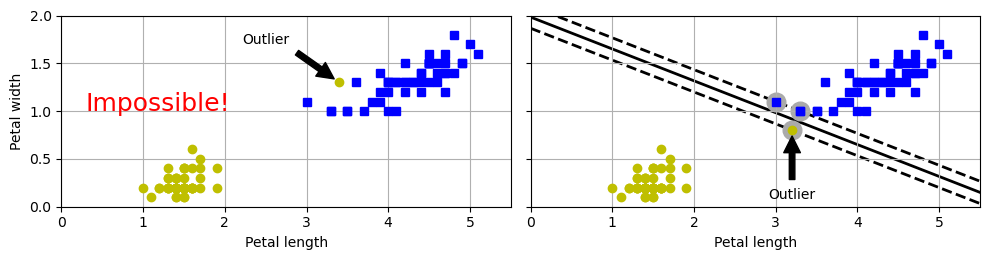

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]


def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)


# extra code – this cell generates and saves Figure 5–3

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", color="red", fontsize=18)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length")
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

save_fig("sensitivity_to_outliers_plot")
plt.show()

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Iris virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

c:\Users\kelve\anaconda3\envs\ML\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [3]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [4]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

c:\Users\kelve\anaconda3\envs\ML\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\kelve\anaconda3\envs\ML\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


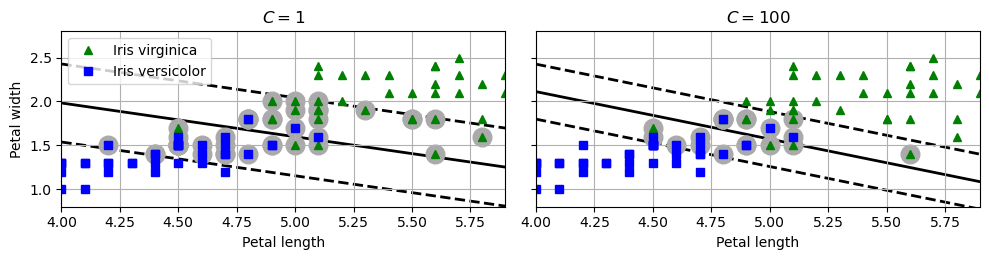

In [5]:
# extra code – this cell generates and saves Figure 5–4

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

save_fig("regularization_plot")
plt.show()

[返回](readme.md)